## Exercise 4

In [1]:
g = graphs.PetersenGraph()

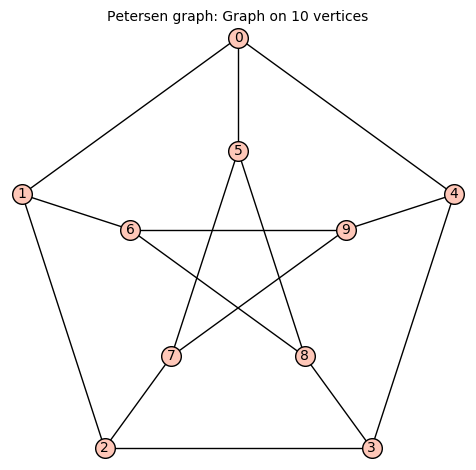

In [2]:
g

In [3]:
p = MixedIntegerLinearProgram(maximization=True)
b = p.new_variable(binary=True)
p.set_objective(sum([b[u] for u in g]))

for (u, v) in g.edges(labels=None):
    p.add_constraint(b[u] + b[v] <= 1)
    
p.write_lp("maximun-independent-set-sage-lp.lp")

In [4]:
p.solve()

4.0

In [5]:
b = p.get_values(b)
m = [u for u in g if b[u] == 1]
print m

[0, 3, 6, 7]


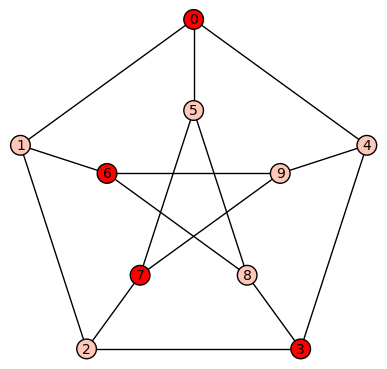

In [6]:
g.show(vertex_colors={"red":m})

## Exercise 5

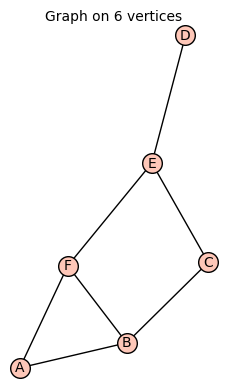

In [7]:
g = Graph({'A':['B', 'F'], 'F':['E', 'B'], 'B':['C'], 'C':['E'], 'E':['F', 'D']})
g

In [8]:
def maximumMatching(g):
    p = MixedIntegerLinearProgram(maximization=True)
    b = p.new_variable(binary=True)
    
    B = lambda x, y: b[(x,y) if x < y else (y, x)]
    
    p.set_objective(sum([B(u, v) for (u,v) in g.edges(labels=None)]))

    for v in g.vertices():

        edges_connected_to_v = [edge for edge in g.edges(labels=None) if v in edge]
        
        p.add_constraint(sum([B(u,v) for (u,v) in edges_connected_to_v]) <= 1)
        
    p.write_lp("maximun-matching-sage-lp.lp")
    
    display(p.solve())
    
    b = p.get_values(b)
    display(b)
    matching = [(u,v) for (u,v) in g.edges(labels=None) if B(u,v) == 1]
    
    return matching

3.0

{('A', 'B'): 0.0,
 ('A', 'F'): 1.0,
 ('B', 'C'): 1.0,
 ('B', 'F'): 0.0,
 ('C', 'E'): 0.0,
 ('D', 'E'): 1.0,
 ('E', 'F'): 0.0}

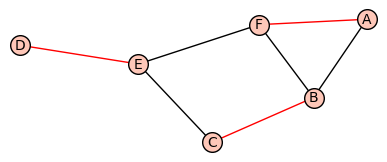

In [9]:
g.show(edge_colors={"red":maximumMatching(g)})

3.0

{('A', 'B'): 0.0,
 ('A', 'F'): 1.0,
 ('B', 'C'): 1.0,
 ('B', 'F'): 0.0,
 ('C', 'E'): 0.0,
 ('D', 'E'): 1.0,
 ('E', 'F'): 0.0}

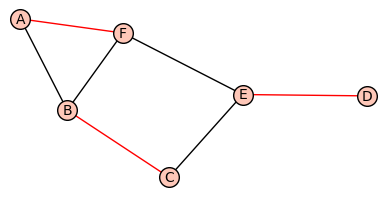

In [10]:
def relaxedMaximumMatching(g):
    p = MixedIntegerLinearProgram(maximization=True)
    b = p.new_variable(binary=False)
    
    B = lambda x, y: b[(x,y) if x < y else (y, x)]
    
    p.set_objective(sum([B(u, v) for (u,v) in g.edges(labels=None)]))

    for v in g.vertices():

        edges_connected_to_v = [edge for edge in g.edges(labels=None) if v in edge]
        
        p.add_constraint(sum([B(u,v) for (u,v) in edges_connected_to_v]) <= 1)
        
    display(p.solve())

    b = p.get_values(b)
    display(b)
    matching = [(u,v) for (u,v) in g.edges(labels=None) if B(u,v) == 1]
    return matching

g.show(edge_colors={"red":relaxedMaximumMatching(g)})

### Comment: problem is not NP-hard thats why we recieve the same values.

## Exercise 6

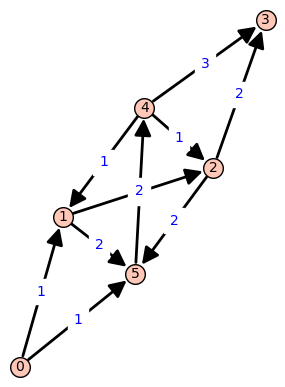

In [11]:
g = Matrix([[0,1,0,0,0,1],
            [0,0,3,0,0,2],
            [0,0,0,2,0,2],
            [0,0,0,0,0,0],
            [0,1,1,3,0,0],
            [0,0,0,0,2,0]])

# g = Matrix([[0,10,0,0,0,1],
#             [0,0,3,0,0,20],
#             [0,0,0,20,0,20],
#             [0,0,0,0,0,0],
#             [0,1,10,30,0,0],
#             [0,0,0,0,2,0]])

g = DiGraph(g, weighted=True)
g.show(edge_labels=True)

In [12]:
def shortestPath(g, start, end):
    p = MixedIntegerLinearProgram(maximization=False)
    
    b = p.new_variable(binary=True)
        
    weights = g.weighted_adjacency_matrix()
    
    p.set_objective(sum([weights[u,v]*b[(u,v)] for (u,v) in g.edges(labels=None)]))
    
    
    for vertice in [v for v in g.vertices() if v!=start and v!=end]:
        
        enters_in_vertice = [b[(u,v)] for (u,v) in g.edges(labels=None) if v == vertice]
        
        exits_from_vertice = [b[(u,v)] for (u,v) in g.edges(labels=None) if u == vertice]
        
        p.add_constraint(sum(enters_in_vertice)== sum(exits_from_vertice))
        
            
    exits_from_start = [b[(u,v)] for (u,v) in g.edges(labels=None) if u==start]
    p.add_constraint(sum(exits_from_start)== 1)

    enters_in_end = [b[(u,v)] for (u,v) in g.edges(labels=None) if v==end]
    p.add_constraint(sum(enters_in_end)== 1)
    
    display(p.solve())
    
    b = p.get_values(b)
    
    display(b)
    
    path = [(u,v) for (u,v) in g.edges(labels=None) if b[(u,v)] == 1]
    
    return path

6.0

{(0, 1): 0.0,
 (0, 5): 1.0,
 (1, 2): 0.0,
 (1, 5): 0.0,
 (2, 3): 0.0,
 (2, 5): 0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 1.0,
 (5, 4): 1.0}

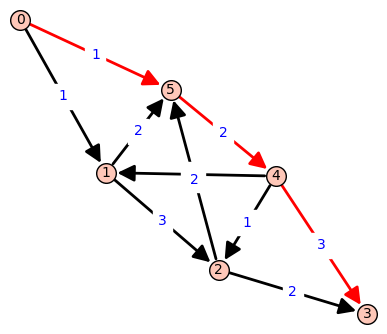

In [13]:
g.show(edge_labels=True, edge_colors={"red": shortestPath(g, 0, 3)})

## Exercise 7

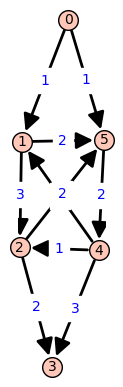

In [14]:
g = Matrix([[0,1,0,0,0,1],
            [0,0,3,0,0,2],
            [0,0,0,2,0,2],
            [0,0,0,0,0,0],
            [0,1,1,3,0,0],
            [0,0,0,0,2,0]])

g = DiGraph(g, weighted=True)
g.show(edge_labels=True)

In [15]:
def maximumFlow(g, start, end):
    p = MixedIntegerLinearProgram(maximization=True)
    
    b = p.new_variable()
        
    capacities = g.weighted_adjacency_matrix()
    
    
    p.set_objective(sum([b[(u,v)] for (u,v) in g.edges(labels=None) if u==start]))
    
    
    for vertice in [v for v in g.vertices() if v!=start and v!=end]:
        
        flow_in_vertice = [b[(u,v)] for (u,v) in g.edges(labels=None) if v == vertice]
        
        flow_from_vertice = [b[(u,v)] for (u,v) in g.edges(labels=None) if u == vertice]
        
        p.add_constraint(sum(flow_in_vertice)== sum(flow_from_vertice))
        
    for (u,v) in g.edges(labels=None):
        p.add_constraint(0<= b[(u,v)] <= capacities[u,v])
    
    display(p.solve())
    
    b = p.get_values(b)
    
    display(b)
    
    path = [(u,v) for (u,v) in g.edges(labels=None) if b[(u,v)] > 0]
    
    flow_capacity = [(b[(u,v)], capacities[u,v]) for (u,v) in g.edges(labels=None)]
    
    return path, flow_capacity

2.0

{(0, 1): 1.0,
 (0, 5): 1.0,
 (1, 2): 1.0,
 (1, 5): -0.0,
 (2, 3): 1.0,
 (2, 5): -0.0,
 (4, 1): -0.0,
 (4, 2): -0.0,
 (4, 3): 1.0,
 (5, 4): 1.0}

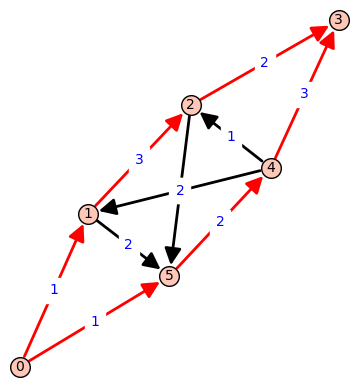

In [16]:
path, flow_capacity = maximumFlow(g, 0, 3)

g.show(edge_labels=flow_capacity, edge_colors={"red": path})

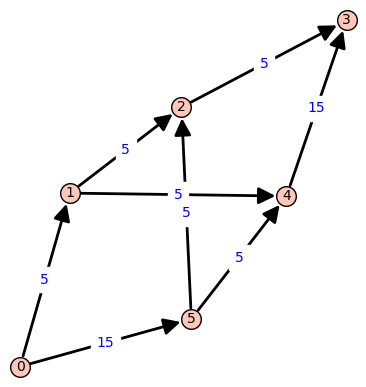

15.0

{(0, 1): 5.0,
 (0, 5): 10.0,
 (1, 2): -0.0,
 (1, 4): 5.0,
 (2, 3): 5.0,
 (4, 3): 10.0,
 (5, 2): 5.0,
 (5, 4): 5.0}

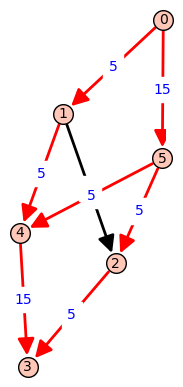

In [18]:
g = Matrix([[0,5,0,0,0,15],
            [0,0,5,0,5,0],
            [0,0,0,5,0,0],
            [0,0,0,0,0,0],
            [0,0,0,15,0,0],
            [0,0,5,0,5,0]])

g = DiGraph(g, weighted=True)
g.show(edge_labels=True)

path, flow_capacity = maximumFlow(g, 0, 3)

g.show(edge_labels=flow_capacity, edge_colors={"red": path})